<a href="https://colab.research.google.com/github/shahid786ali/Content_Based_and_Collaborative_Filtering_Models/blob/main/Mnist_Fashion_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist


In [ ]:
import tensorflow as tf

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
x_train


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
x_train.shape


(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
import matplotlib.pyplot as plt


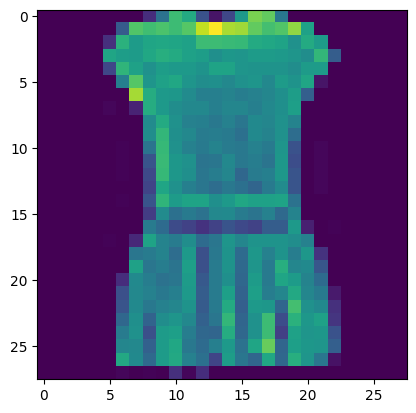

In [ ]:
plt.imshow(x_train[3])

In [ ]:
import pandas as pd
pd.Series(y_train).nunique()

10

In [ ]:
x_train = x_train.reshape(x_train.shape [0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape [0], 28, 28, 1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_train = x_train /255.0
x_test = x_test /255.0

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, AveragePooling2D
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 strides=(1, 1),
                 activation='relu',
                 input_shape=(28, 28, 1)))

model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten ())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))



In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 32)       0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 1000)              4609000   
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 4,619,842
Trainable params: 4,619,842
Non-trainable params: 0
______________________________________________

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 22s 5ms/step - loss: 0.3839 - accuracy: 0.8618
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2647 - accuracy: 0.9015
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2213 - accuracy: 0.9179
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1817 - accuracy: 0.9322
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1519 - accuracy: 0.9431
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1254 - accuracy: 0.9529
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1031 - accuracy: 0.9604
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0864 - accuracy: 0.9669
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0702 - accuracy: 0.9742
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.06

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=2)

Epoch 1/2
469/469 [==============================] - 4s 6ms/step - loss: 0.0307 - accuracy: 0.9896
Epoch 2/2
469/469 [==============================] - 3s 6ms/step - loss: 0.0202 - accuracy: 0.9934


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


313/313 [==============================] - 1s 3ms/step - loss: 0.4147 - accuracy: 0.9207
Test Loss: 0.4147
Test Accuracy: 0.9207
